In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_ds.class_names

In [ ]:
val_ds.class_names

In [24]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

# Загрузка изображения и масштабирование до размера (150, 150)
img_path = '/content/drive/MyDrive/DD картинка/images (3).jpg'
img = load_img(img_path, target_size=(150, 150))

# Преобразование изображения в массив numpy и добавление измерения по оси батча
img_array = np.expand_dims(img, axis=0)

# Предсказание класса с помощью обученной модели
predictions = model.predict(img_array)
# Вывод результатов
if predictions[0] < 0.5:
    print("Модель предсказывает класс 0 (дино)")
else:
    print("Модель предсказывает класс 1 (дракон)")
print(predictions[0])

1/1 [==============================] - 0s 26ms/step
Модель предсказывает класс 1 (дракон)
[1.]


In [ ]:
import numpy as np
np.mean(history_1.history['val_binary_accuracy'])

0.8040609161059061

In [ ]:
np.std(history_1.history['val_loss'])

0.07429795272410566

Конечный результат, первые 15 эпох и дообучение на 10 эпохах с аугментированными данными

In [2]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DD/train',
    class_mode = 'binary',
    batch_size=32,
    target_size=(150, 150),
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/DD/test',
    class_mode = 'binary',
    batch_size=32,
    target_size=(150, 150),
    shuffle = True
)

model = keras.Sequential()
model = keras.Sequential([
    keras.Input(shape=(150, 150, 3)),  # Входной слой

    keras.layers.Conv2D(32, (3, 3), activation='relu'), # Сверточный слой, Слой свёртки включает в себя для каждого канала свой фильтр, ядро свёртки которого обрабатывает предыдущий слой по фрагментам
    keras.layers.Dropout(0.5),
    keras.layers.MaxPooling2D(pool_size=(2, 2)), # Объединение слоев
    keras.layers.Flatten(), # Преобразуем массив данных в вектор, https://keras.io/api/layers/reshaping_layers/flatten
    keras.layers.Dense(64, activation='relu'), # Плотный слой, Этот слой обрабатывает каждый элемент предыдущего слоя, выполняя матричное перемножение этих элементов со своими весами
    keras.layers.Dense(1, activation='sigmoid') # Выходной слой, 1 нейрон - число от 0 до 1 (ближе к 0 - dino, ближе к 1 - dragon), список других активаций: https://keras.io/api/layers/activations/
])

opt = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8) # использование оптимайзера
loss = keras.losses.BinaryCrossentropy(from_logits=False)  # https://keras.io/api/losses/probabilistic_losses
model.compile(optimizer=opt, loss=loss, metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)]) # Метрицки оценки нейронной сети
history_1 = model.fit(train_generator, epochs=15, validation_data=val_generator) # тренировка модели на train_ds, и проверка точности на val_ds(папка test)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.
Epoch 1/15
50/50 [==============================] - 526s 10s/step - loss: 0.6732 - binary_accuracy: 0.5866 - val_loss: 0.6182 - val_binary_accuracy: 0.5761
Epoch 2/15
50/50 [==============================] - 10s 209ms/step - loss: 0.5080 - binary_accuracy: 0.7748 - val_loss: 0.5026 - val_binary_accuracy: 0.8503
Epoch 3/15
50/50 [==============================] - 11s 215ms/step - loss: 0.4413 - binary_accuracy: 0.8143 - val_loss: 0.4834 - val_binary_accuracy: 0.7893
Epoch 4/15
50/50 [==============================] - 11s 215ms/step - loss: 0.3932 - binary_accuracy: 0.8344 - val_loss: 0.4442 - val_binary_accuracy: 0.8299
Epoch 5/15
50/50 [==============================] - 10s 207ms/step - loss: 0.3416 - binary_accuracy: 0.8632 - val_loss: 0.3873 - val_binary_accuracy: 0.8579
Epoch 6/15
50/50 [==============================] - 10s 209ms/step - loss: 0.3312 - binary_accuracy: 0.8545 - val_loss: 0.4127 - val_

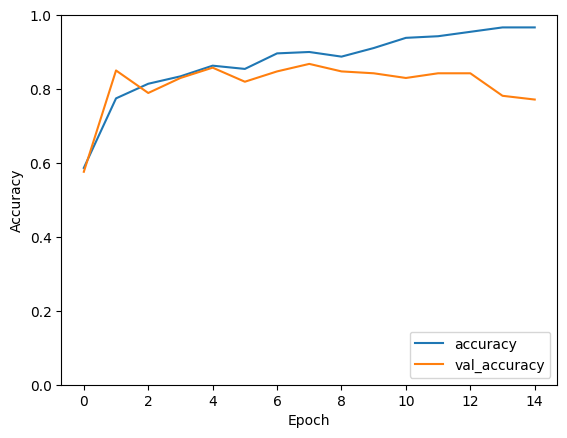

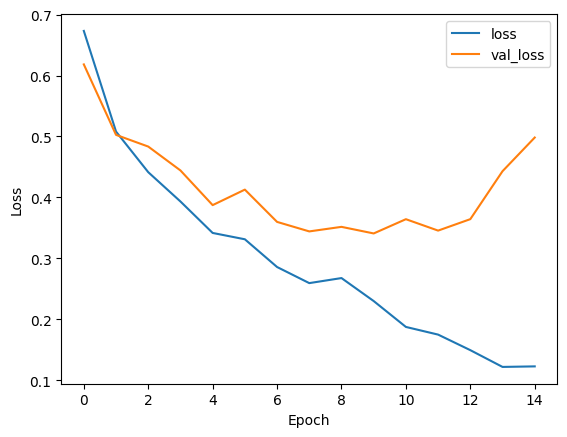

In [3]:
import matplotlib.pyplot as plt

# График точности
plt.plot(history_1.history['binary_accuracy'], label='accuracy')
plt.plot(history_1.history['val_binary_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# График функции потерь
plt.plot(history_1.history['loss'], label='loss')
plt.plot(history_1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


дообучение с сохранением старой модели

In [15]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Определим аугментированные генераторы данных
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Загрузим данные для обучения и валидации
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DD/train',
    class_mode='binary',
    batch_size=20,
    target_size=(150, 150),
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/DD/test',
    class_mode='binary',
    batch_size=20,
    target_size=(150, 150),
    shuffle=True
)

# Создадим новую модель с теми же слоями
new_model = keras.Sequential([
    keras.Input(shape=(150, 150, 3)),  # Входной слой
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    #keras.layers.Dropout(0.5),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Скопируем веса из старой модели в новую модель
model_weights = model.get_weights()
new_model.set_weights(model_weights)

# Компиляция новой модели
opt = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy(from_logits=False)
new_model.compile(optimizer=opt, loss=loss, metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)])

# Дообучение новой модели
history_2 = new_model.fit(train_generator, initial_epoch=15, epochs=25, validation_data=val_generator)



Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.
Epoch 16/25
80/80 [==============================] - 20s 242ms/step - loss: 0.4304 - binary_accuracy: 0.8036 - val_loss: 0.5503 - val_binary_accuracy: 0.7157
Epoch 17/25
80/80 [==============================] - 19s 236ms/step - loss: 0.4371 - binary_accuracy: 0.7942 - val_loss: 0.3058 - val_binary_accuracy: 0.8655
Epoch 18/25
80/80 [==============================] - 19s 238ms/step - loss: 0.3854 - binary_accuracy: 0.8231 - val_loss: 0.3393 - val_binary_accuracy: 0.8426
Epoch 19/25
80/80 [==============================] - 18s 231ms/step - loss: 0.3864 - binary_accuracy: 0.8281 - val_loss: 0.3473 - val_binary_accuracy: 0.8325
Epoch 20/25
80/80 [==============================] - 19s 241ms/step - loss: 0.3725 - binary_accuracy: 0.8350 - val_loss: 0.3461 - val_binary_accuracy: 0.8579
Epoch 21/25
80/80 [==============================] - 19s 242ms/step - loss: 0.3745 - binary_accuracy: 0.8344 - val_loss: 0.4982

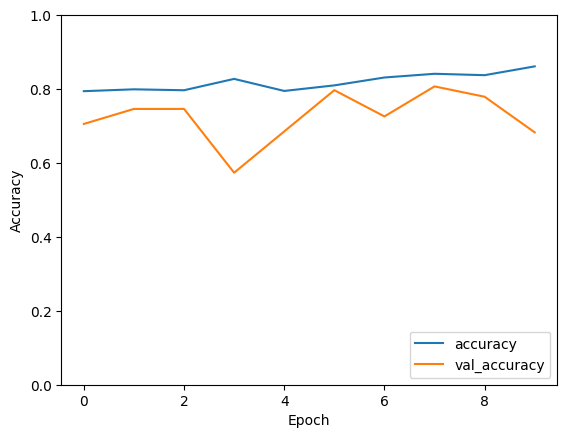

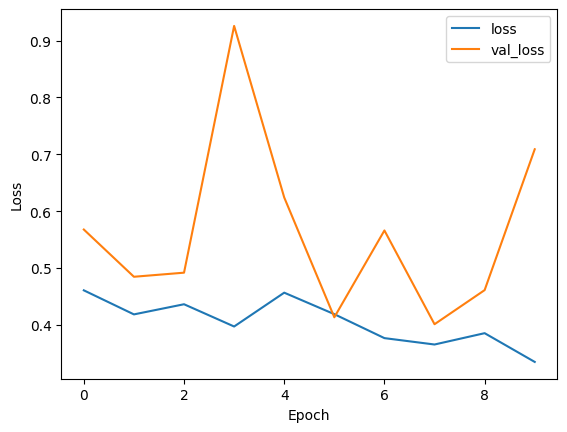

In [ ]:

# График точности
plt.plot(history_2.history['binary_accuracy'], label='accuracy')
plt.plot(history_2.history['val_binary_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# График функции потерь
plt.plot(history_2.history['loss'], label='loss')
plt.plot(history_2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [ ]:
np.mean(history_2.history['val_binary_accuracy'][6:])

In [ ]:
history_1.history

In [ ]:
history_1

In [25]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

# Загрузка изображения и масштабирование до размера (150, 150)
img_path = '/content/drive/MyDrive/DD картинка/images (3).jpg'
img = load_img(img_path, target_size=(150, 150))

# Преобразование изображения в массив numpy и добавление измерения по оси батча
img_array = np.expand_dims(img, axis=0)

# Предсказание класса с помощью обученной модели
predictions = new_model.predict(img_array)
# Вывод результатов
if predictions[0] < 0.5:
    print("Модель предсказывает класс 0 (дино)")
else:
    print("Модель предсказывает класс 1 (дракон)")

1/1 [==============================] - 0s 17ms/step
Модель предсказывает класс 0 (дино)


In [29]:
new_model.save('/content/drive/MyDrive/DD картинка/cnn_newmodel.keras', overwrite=False)


In [28]:
new_model.save_weights('/content/drive/MyDrive/DD картинка/cnn_newlayers_weights.h5', overwrite=True)


In [ ]:
model.summary()

In [4]:
import numpy as np
np.mean(history_1.history['val_binary_accuracy'])

0.8131979664166769

In [5]:
np.std(history_1.history['val_loss'])

0.07766848716776716

In [26]:
np.mean(history_2.history['loss'])

0.3807892620563507

In [27]:
np.mean(history_2.history['val_binary_accuracy'][6:])

0.829314723610878



1.   **BinaryCrossentropy**
2.    Определите общее количество параметров в модели. Для этого примените метод summary. **model.summary()  11215873**
3.   Какова медиана точности обучения по всем эпохам? **np.mean(history_1.history['val_binary_accuracy']) - 0.81**
4.  Каково стандартное отклонение потерь в процессе обучения по всем эпохам? **np.std(history_1.history['val_loss']) - 0.077**
5. Каково среднее значение потерь на тестовом наборе данных по всем эпохам после аугментации?  **np.mean(history_2.history['loss'])** - 0.38
6. Каково среднее значение точности на тестовом наборе данных за последние 5 эпох (с 6 по 10) после аугментации? - **np.mean(history_2.history['val_binary_accuracy'][6:]) - 0.82**

